## Feature Engineering

In [9]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/ridotto2022.csv

--2022-12-15 18:24:16--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/ridotto2022.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.244.121
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.244.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254171 (248K) [text/csv]
Saving to: ‘ridotto2022.csv.1’

ridotto2022.csv.1   100%[===================>] 248.21K   647KB/s    in 0.4s    

2022-12-15 18:24:17 (647 KB/s) - ‘ridotto2022.csv.1’ saved [254171/254171]



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ridotto2022.csv',
                index_col='data',
                parse_dates=True)
df

,y
data,
2022-01-01 00:00:00,0.000000
2022-01-01 01:00:00,0.000000
2022-01-01 02:00:00,0.000000
2022-01-01 03:00:00,0.000000
2022-01-01 04:00:00,0.000000
...,...
2022-12-06 19:00:00,0.010556
2022-12-06 20:00:00,0.000000
2022-12-06 21:00:00,0.000000


In [11]:
def create_features(df):
    """
    Create time series features based on Datetime index dataframe.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_EDA = create_features(df)
df_EDA

,y,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
data,,,,,,,,,
2022-01-01 00:00:00,0.000000,0,5,1,1,2022,1,1,52
2022-01-01 01:00:00,0.000000,1,5,1,1,2022,1,1,52
2022-01-01 02:00:00,0.000000,2,5,1,1,2022,1,1,52
2022-01-01 03:00:00,0.000000,3,5,1,1,2022,1,1,52
2022-01-01 04:00:00,0.000000,4,5,1,1,2022,1,1,52
...,...,...,...,...,...,...,...,...,...
2022-12-06 19:00:00,0.010556,19,1,4,12,2022,340,6,49
2022-12-06 20:00:00,0.000000,20,1,4,12,2022,340,6,49
2022-12-06 21:00:00,0.000000,21,1,4,12,2022,340,6,49


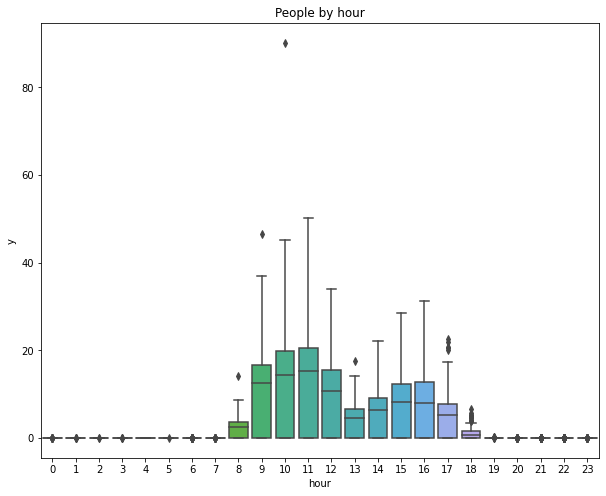

In [13]:
import seaborn as sns

target = 'y'
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='hour', y=target)
ax.set_title('People by hour')
plt.show()

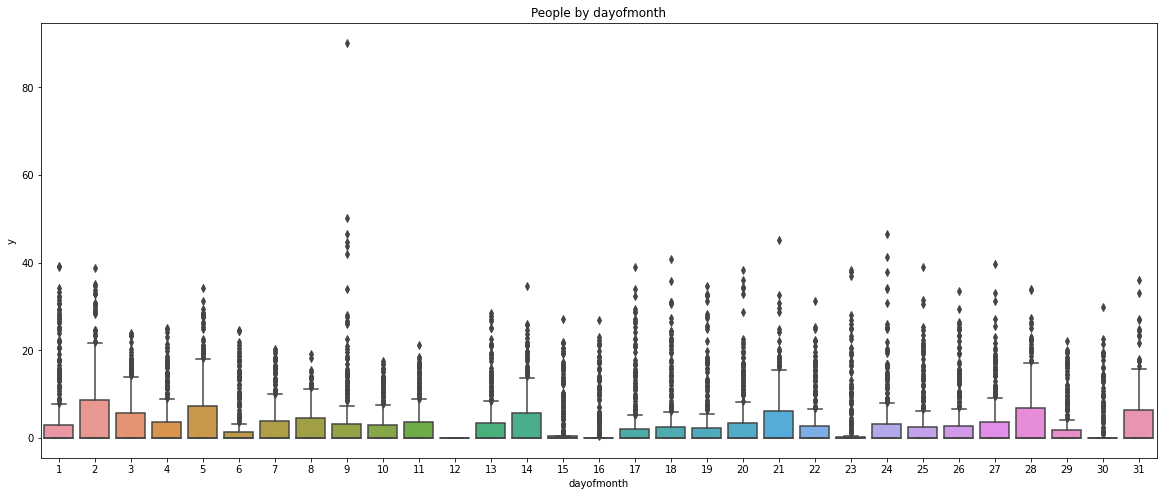

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_EDA, x='dayofmonth', y=target)
ax.set_title('People by dayofmonth')
plt.show()

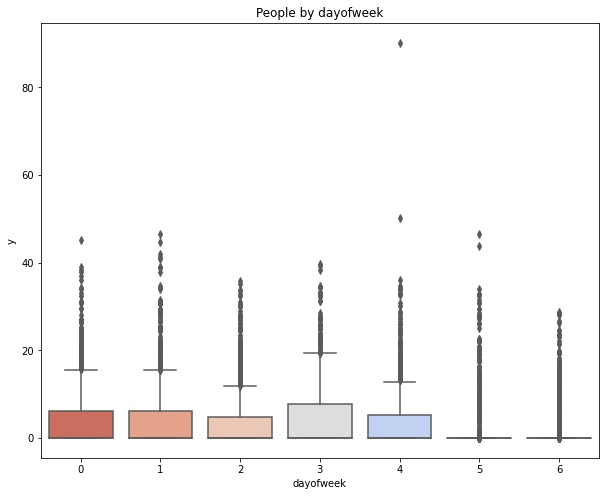

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='dayofweek', y=target, palette='coolwarm_r')
ax.set_title('People by dayofweek')
plt.show()

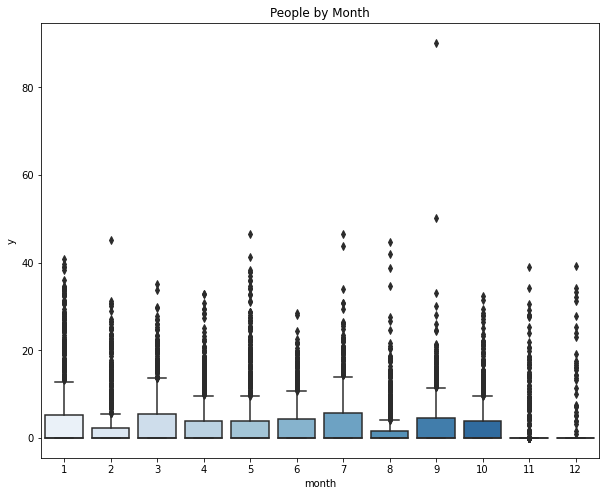

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y=target, palette='Blues')
ax.set_title('People by Month')
plt.show()